In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

### Import data 

In [4]:
electric = pd.read_csv("~/Downloads/Full Eletric Interval 042016.csv", skiprows = 4)
propertyCode = pd.read_excel("~/Downloads/SIMS_Property_List_4-6-2016.xlsx")

In [70]:
electric['Datetime'] = electric['Date'] + ' ' + electric['Start Time']

In [71]:
electric['Datetime'] = pd.to_datetime(electric['Datetime'])
electric['Meter'][0]

'A71 Mitchell Hospital (B1)'

In [5]:
codelist = [b[0] for b in electric['Meter'].str.split()]
codes = pd.Series(codelist)

In [6]:
unicodes = codes.unique()
unicodes = pd.Series(unicodes)

In [62]:
unicodes

0          A71
1          A06
2          F02
3          G02
4          D36
5          A75
6          H01
7          A11
8          A08
9          A84
10         A62
11         A13
12         H02
13         A22
14         C02
15         E21
16         A27
17         A14
18         D14
19         L07
20         A23
21         A17
22         D25
23         I13
24         A16
25         D53
26         N11
27         B34
28         D16
29         C31
        ...   
72         B29
73         D29
74         D48
75         B27
76         NHP
77         C25
78         C03
79         G10
80         D45
81         D01
82         CTS
83        DLAC
84         D18
85         D10
86         B03
87         E09
88         D69
89         F08
90         A25
91       Brain
92         B08
93         I04
94         C13
95         D38
96         D21
97         D42
98         E11
99         B07
100        CCD
101    Kimbark
Length: 102, dtype: object

## Graph by name or code

In [90]:
def singleBuilding(name):
    meterdf = electric[electric['Meter'].str.contains(name)]
    meterdf = meterdf.reset_index()
    meterdf.plot(x="Date", y="Usage", figsize=(40, 20))
    plt.ylabel('Usage (kWh)')
    plt.title(meterdf['Meter'][1])

## Graph by building type

In [7]:
def groupBuilding(name):
    typedf = propertyCode[propertyCode['Building Use'].str.contains(name, na=False)]
    typeCode = []
    for i in typedf['Property Code']:
        typeCode.append(i)
    typeCode = pd.Series(typeCode)
    newTypedf = electric[codes.isin(typeCode)]
    newTypedf.plot(x="Date", y="Usage", figsize=(40,20))


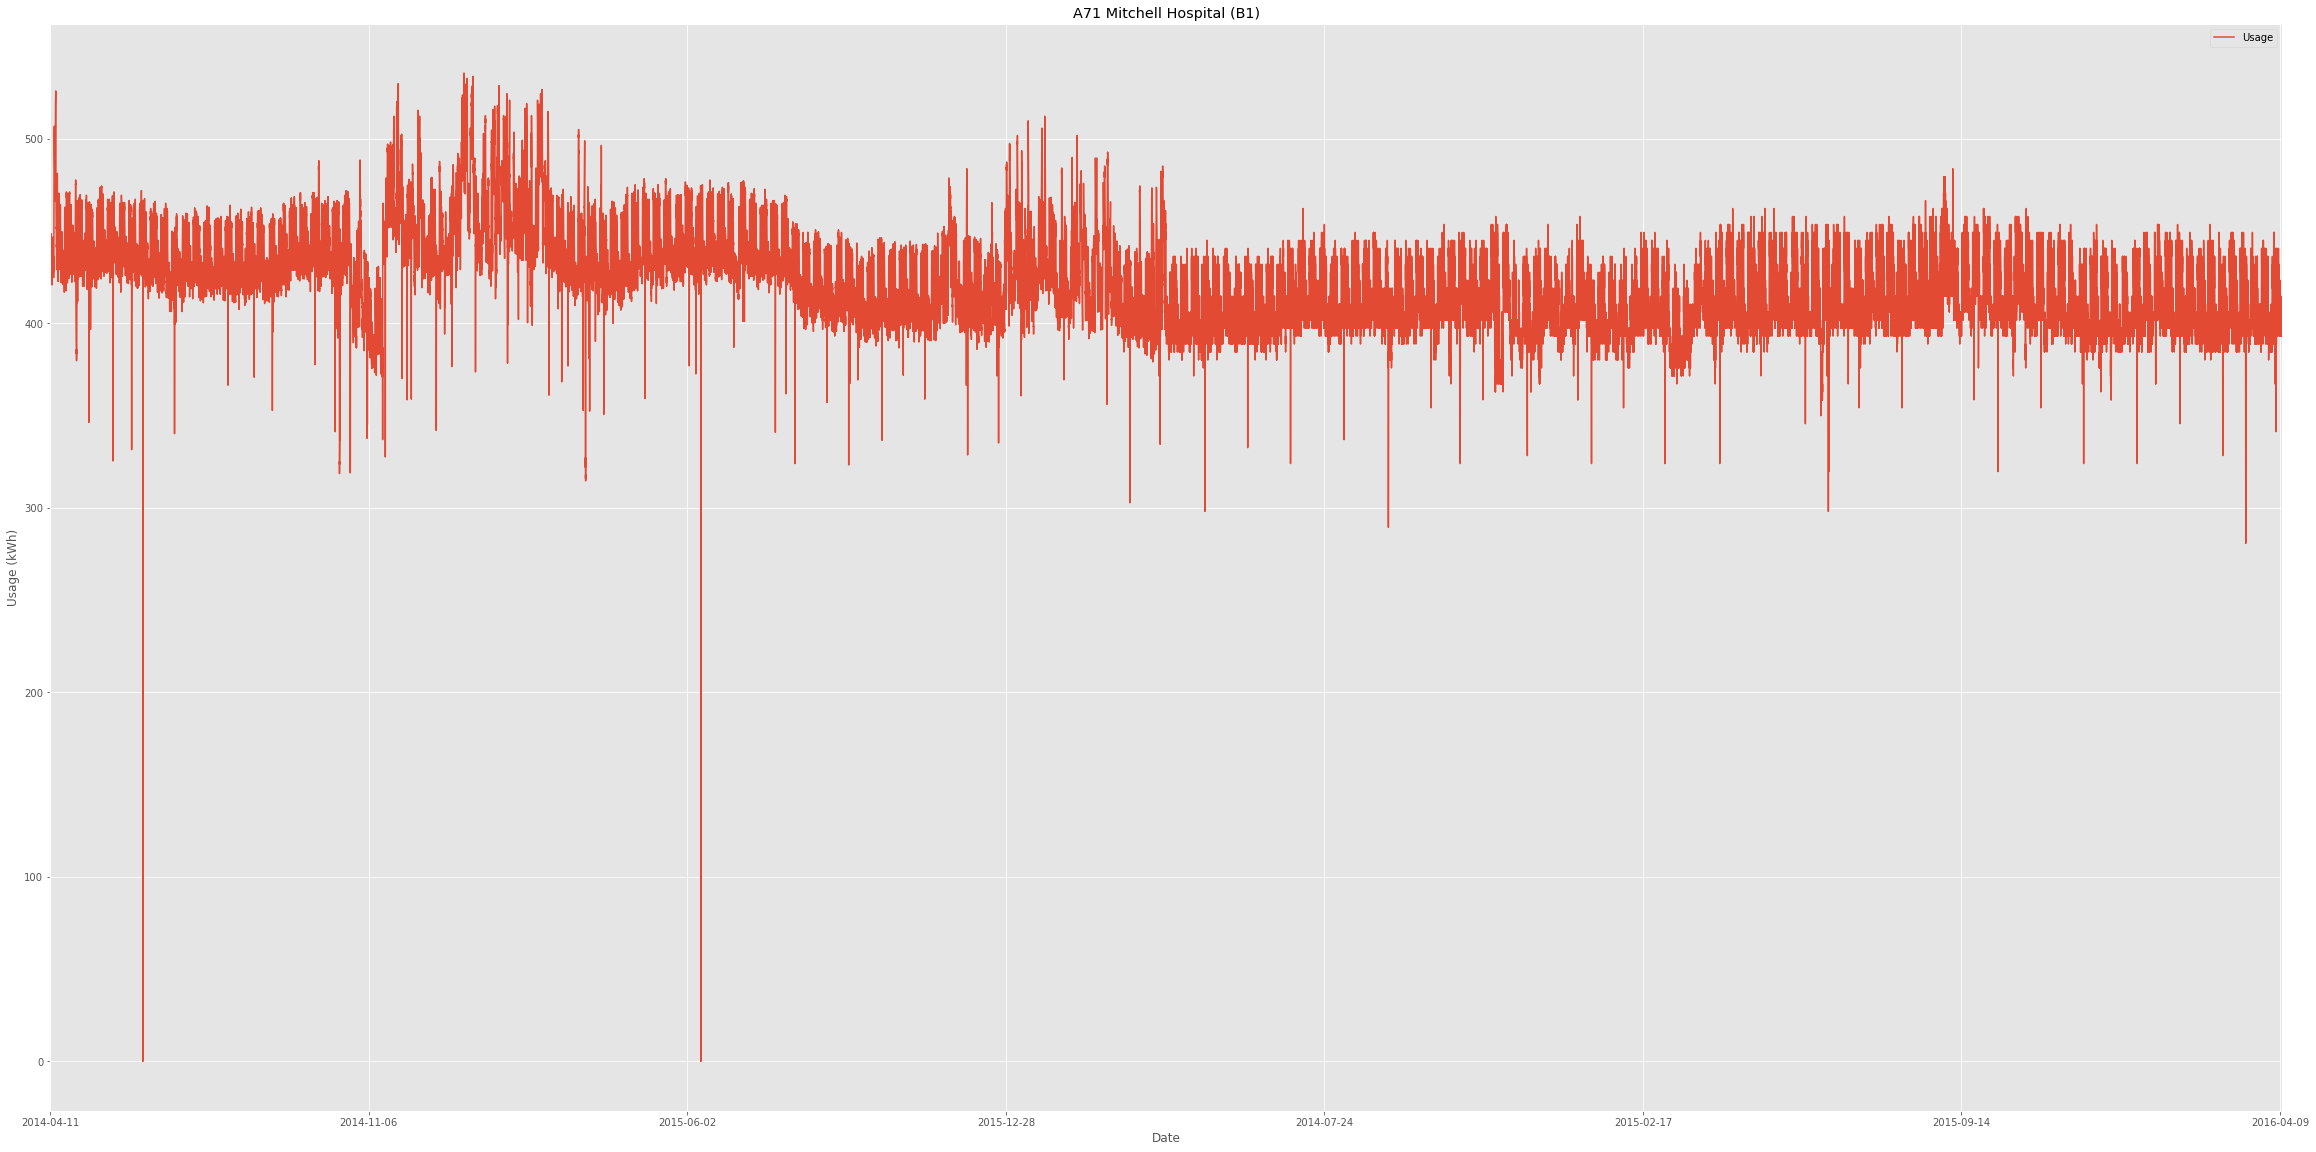

In [92]:
singleBuilding("Mitchell")

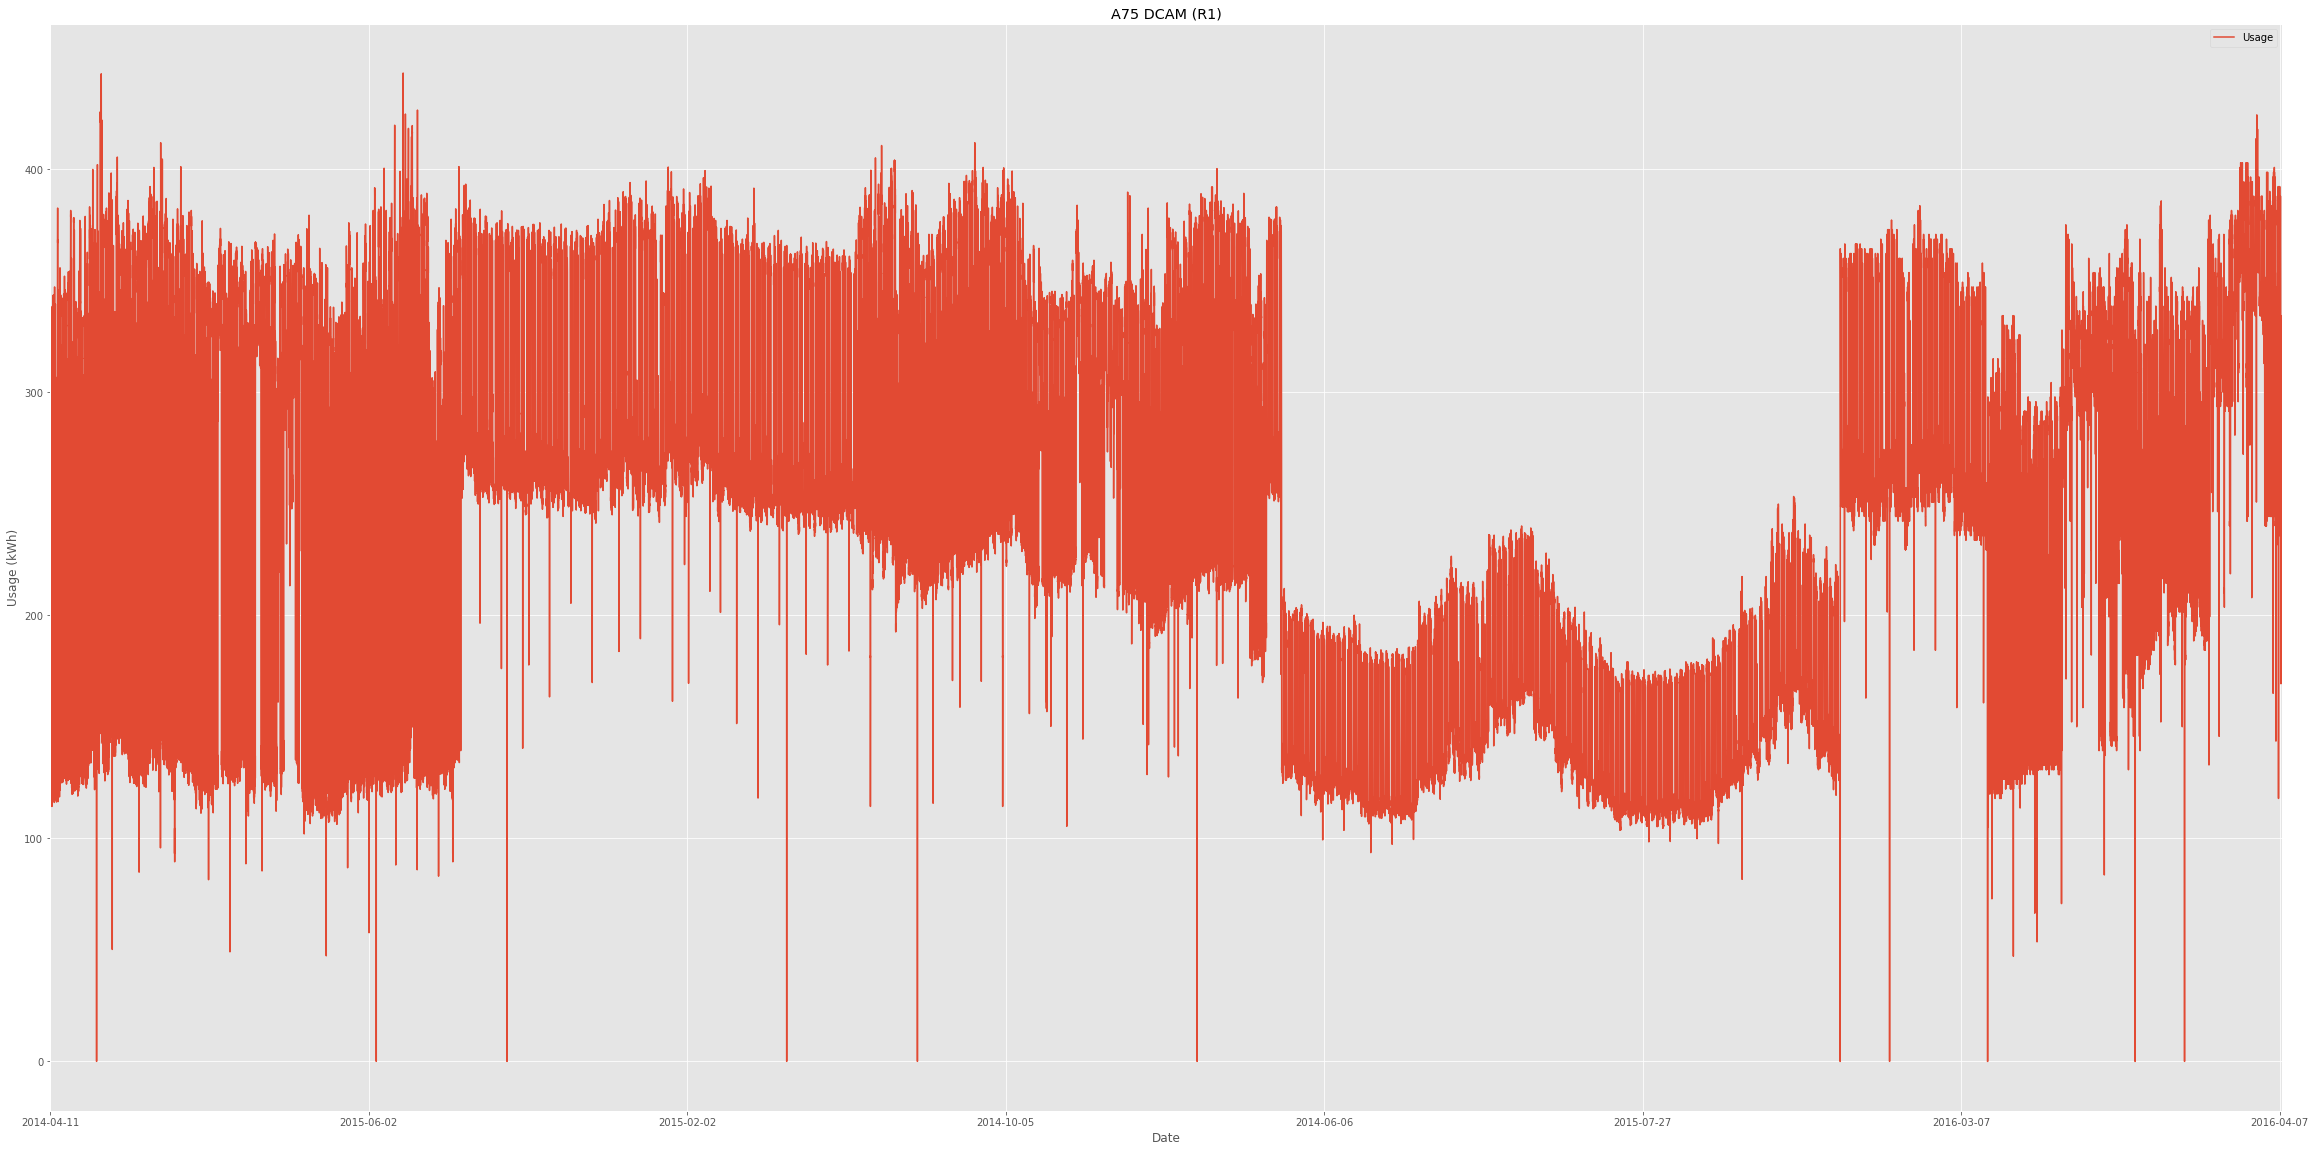

In [91]:
singleBuilding('A75')

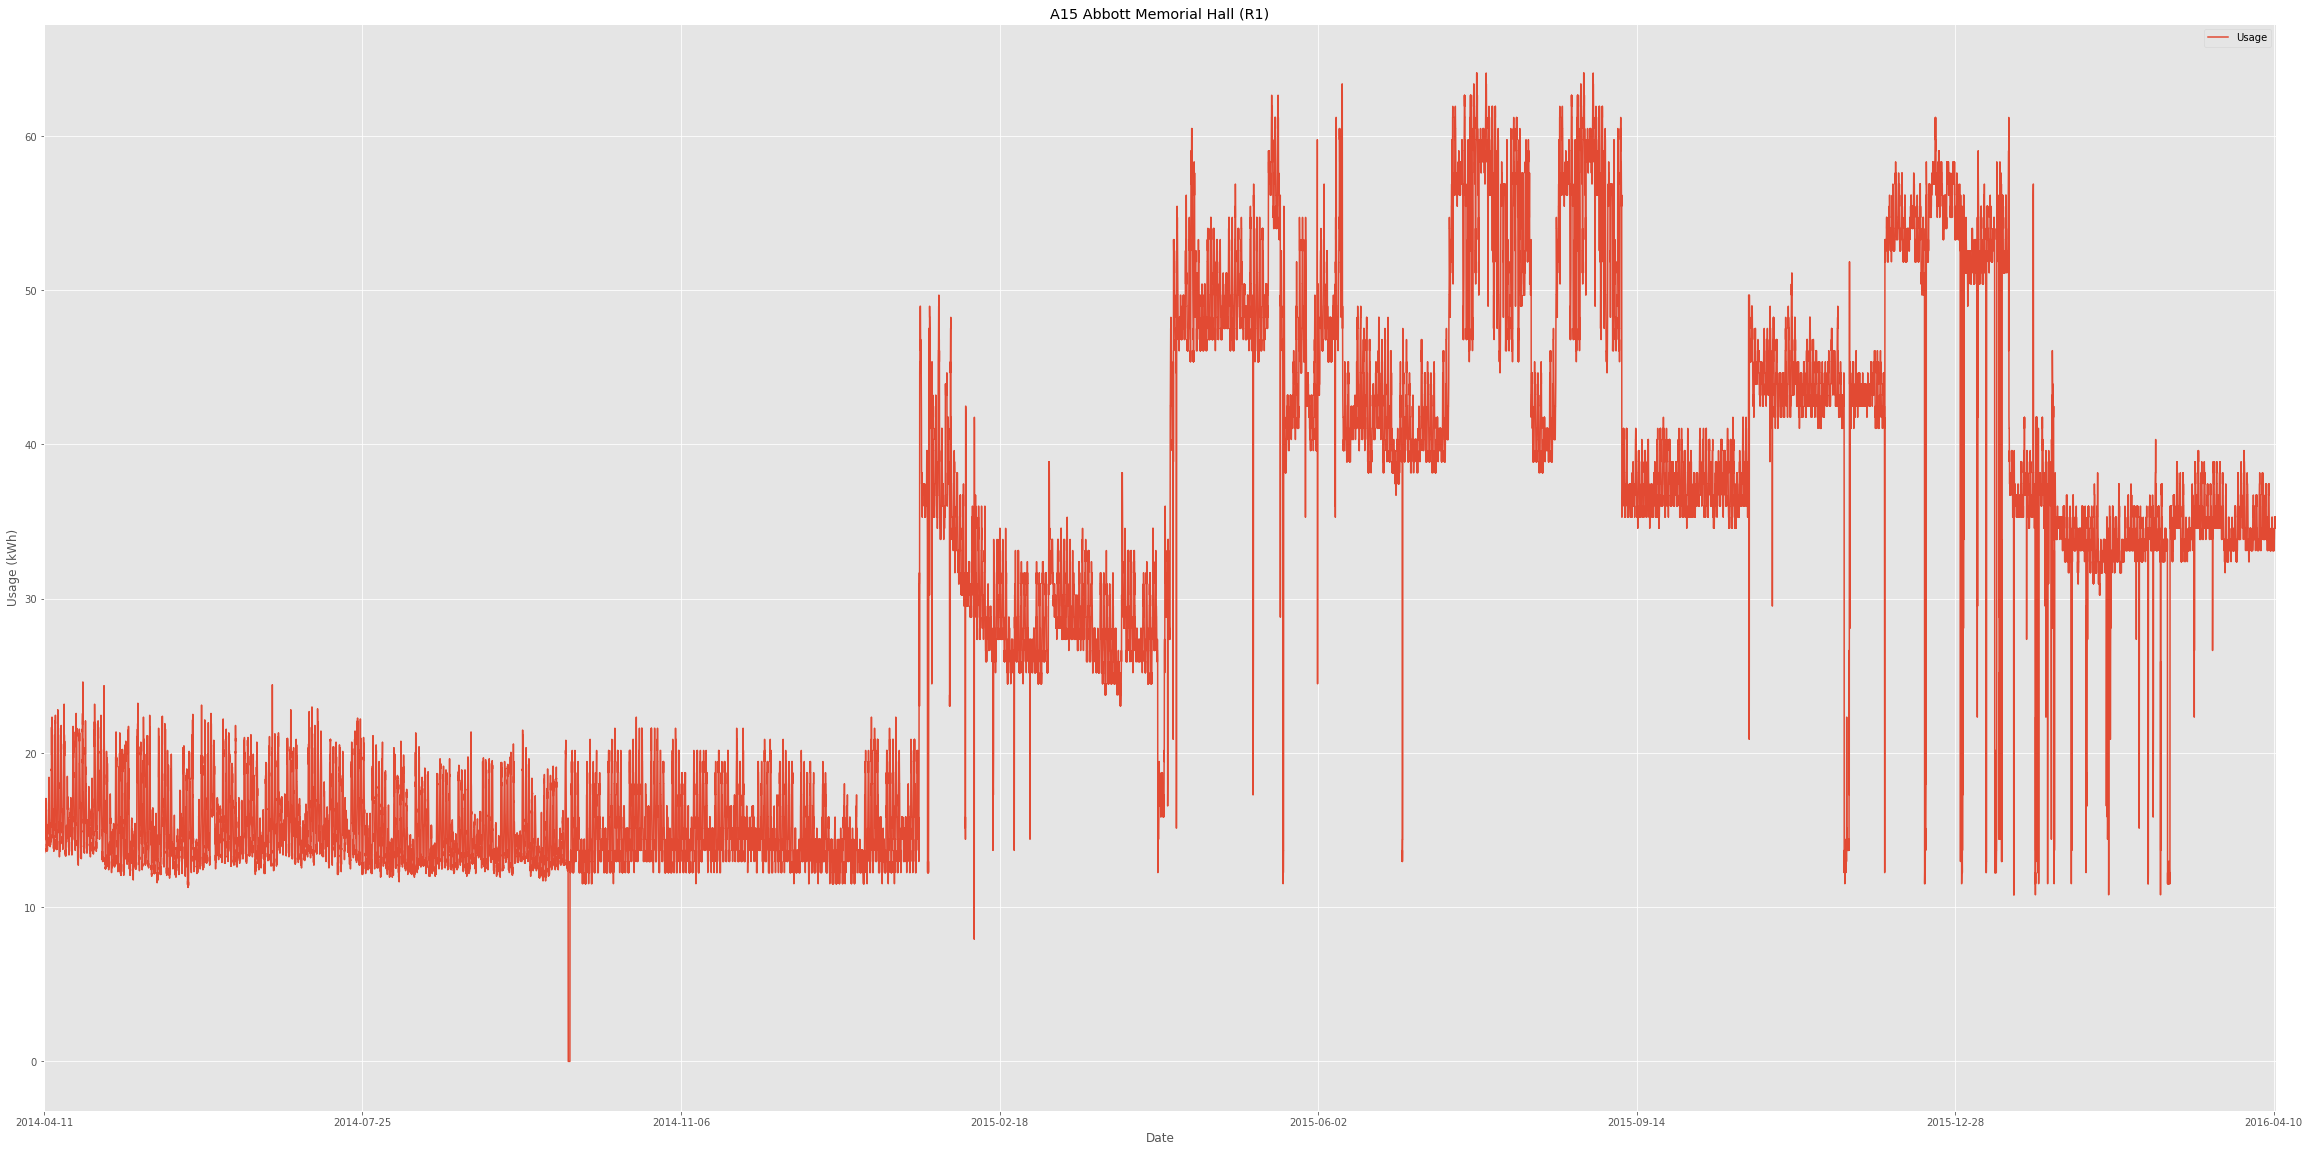

In [95]:
singleBuilding('A15')

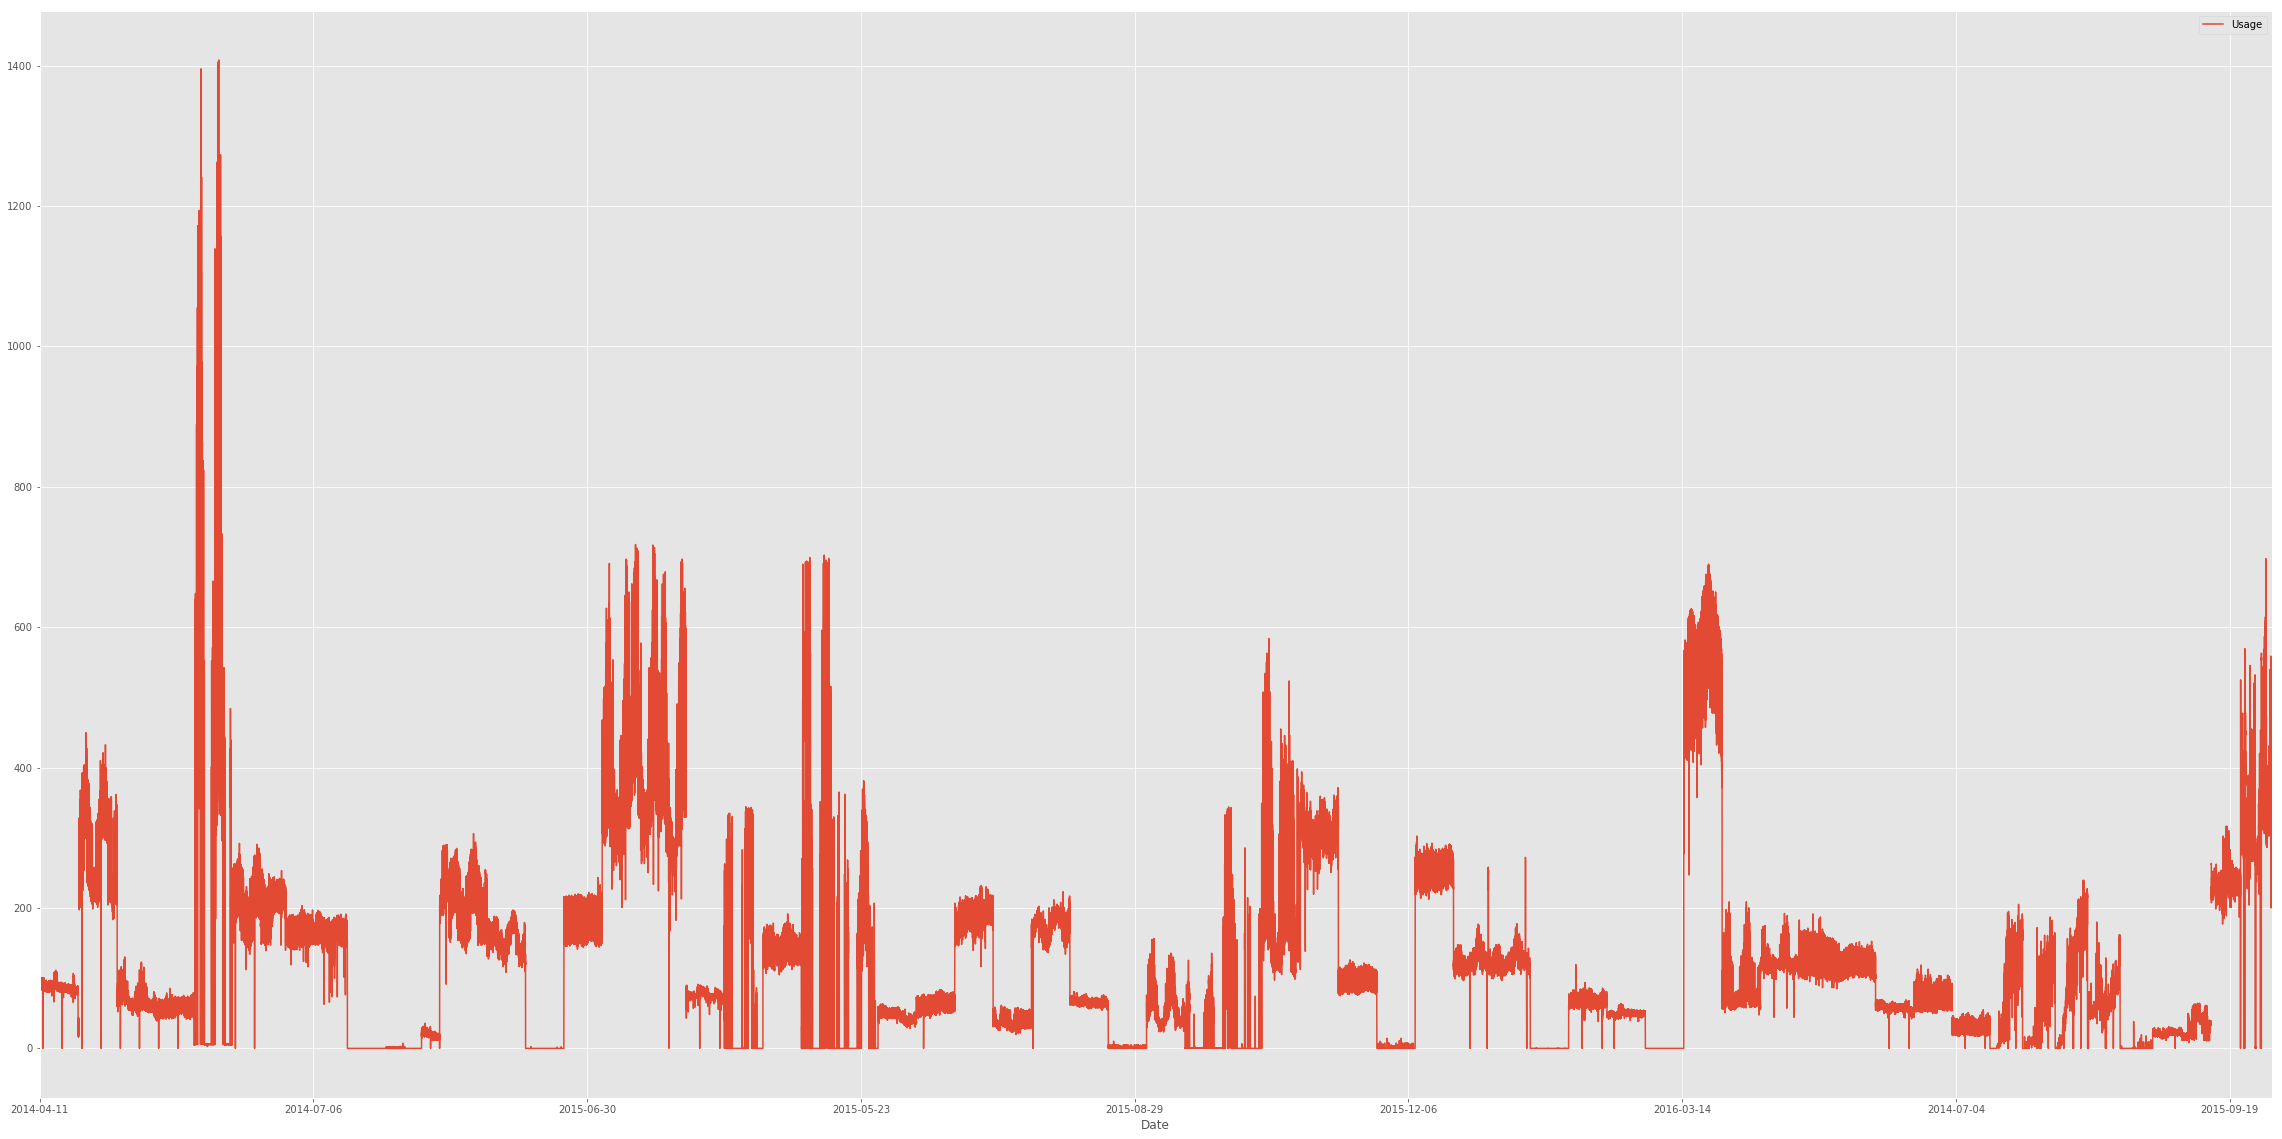

In [24]:
groupBuilding('Laboratory')

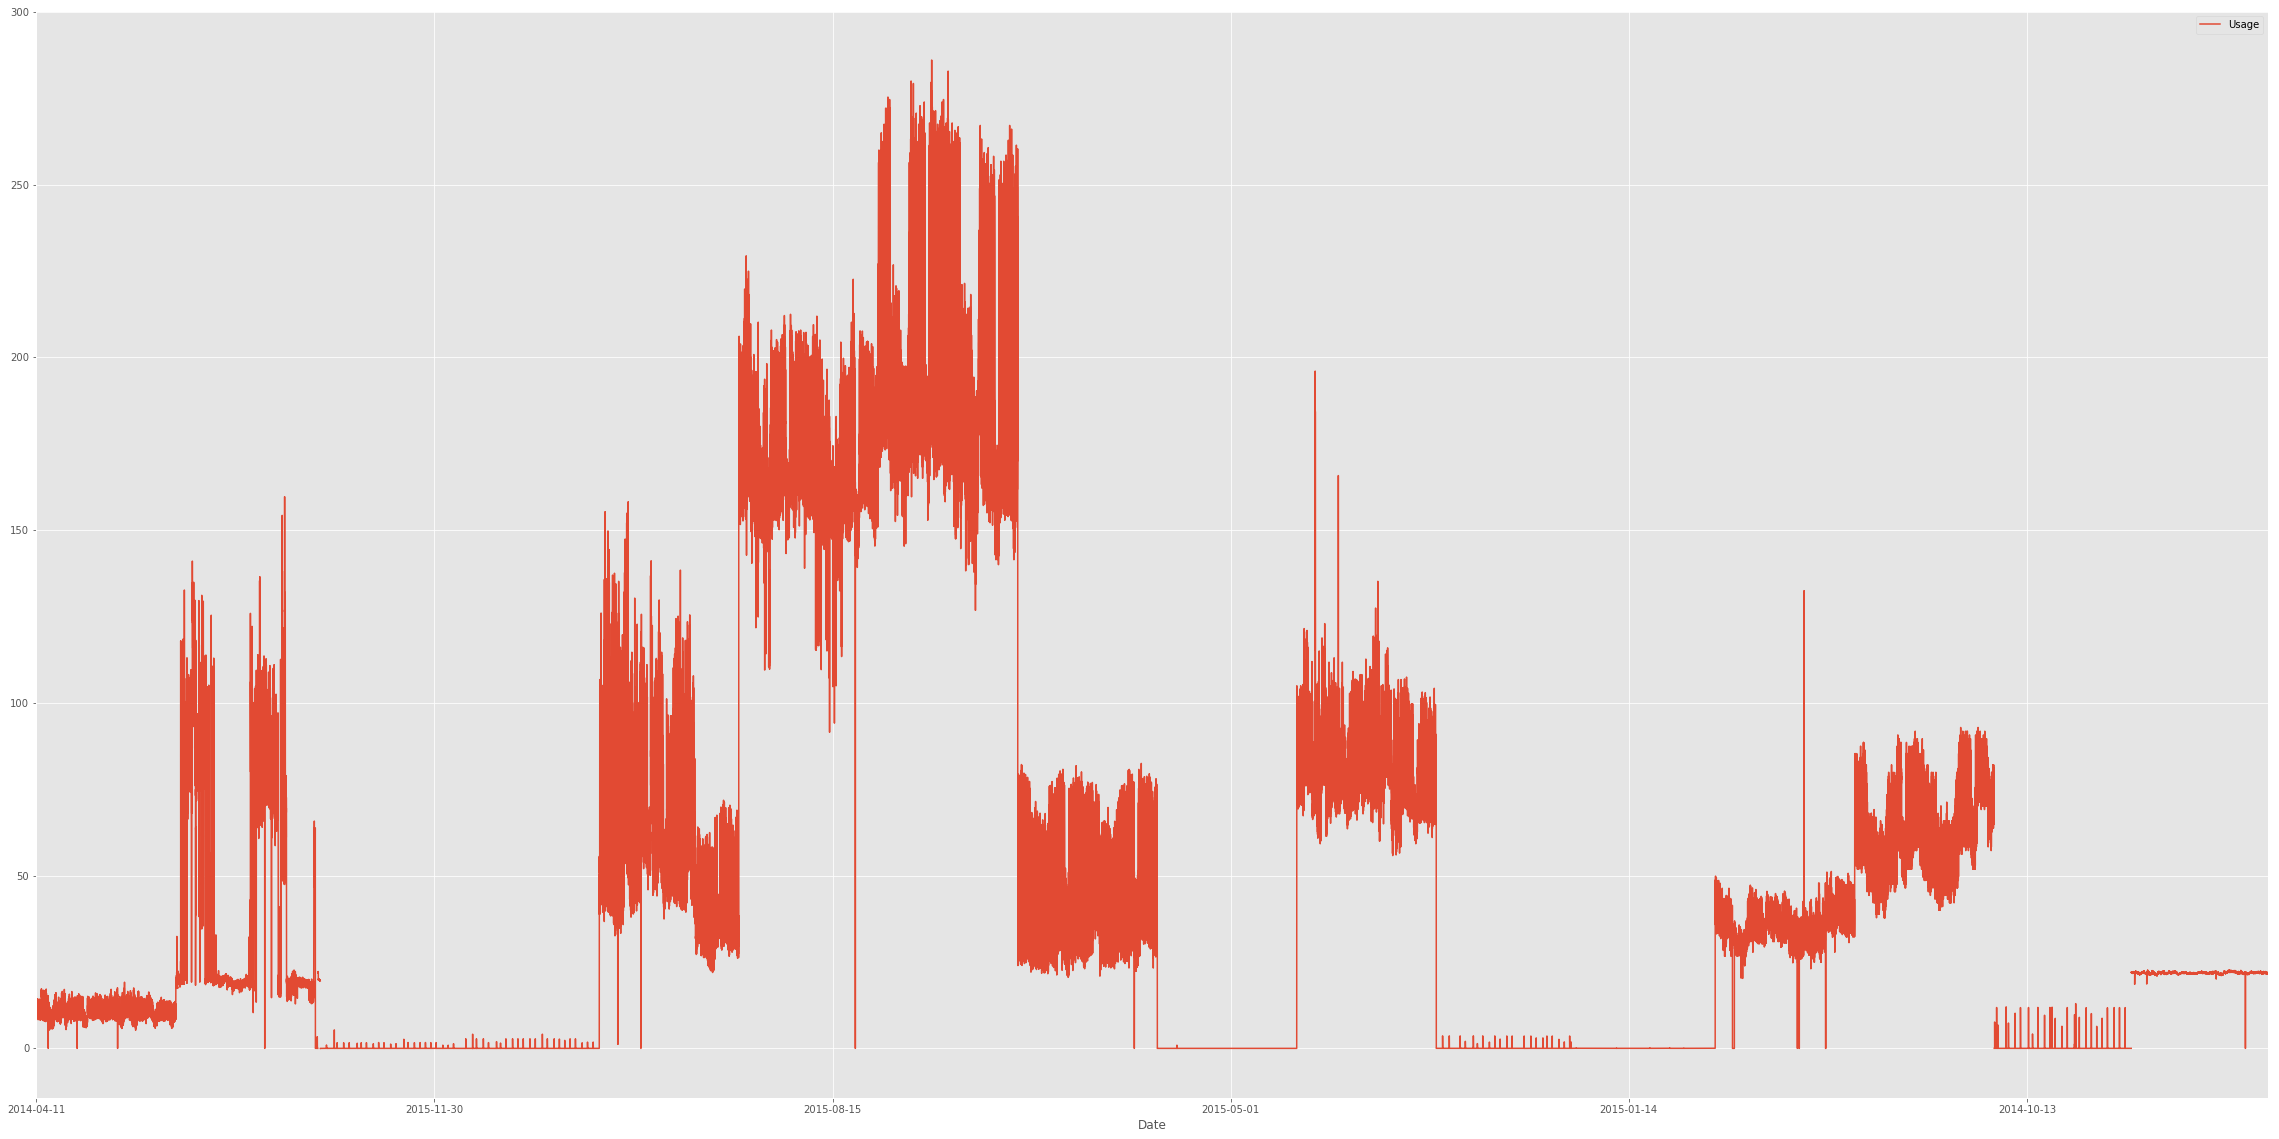

In [96]:
groupBuilding('Dorm')

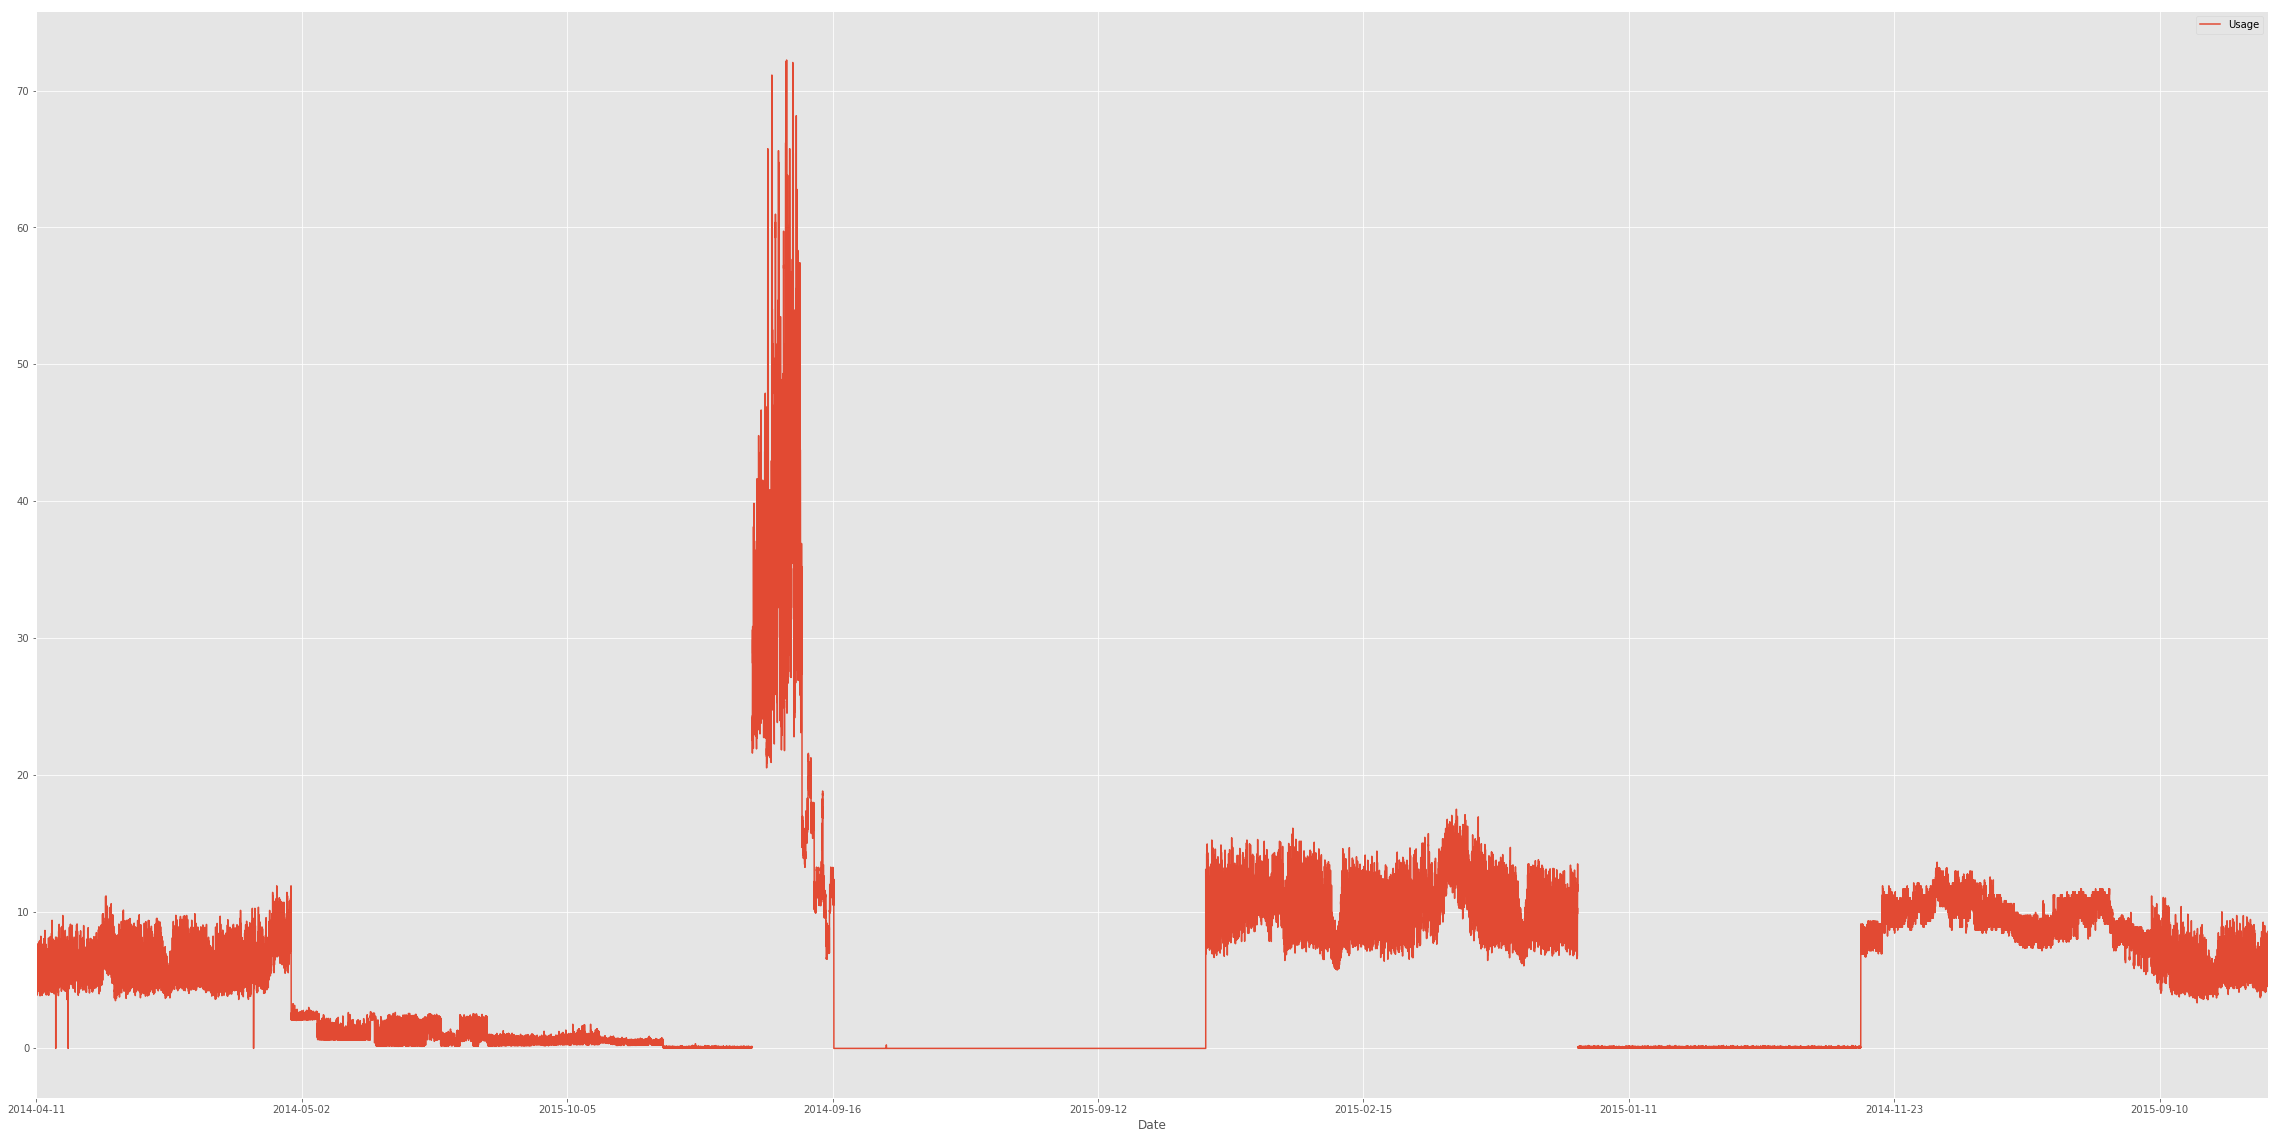

In [97]:
groupBuilding("Residential")

## Cumulative Data

In [27]:
clst = []
for i in unicodes:
    #for each unique code, find its Usage value in master df and add them all together, then append to list
    clst.append(electric.Usage[codes.isin([i])].sum())

In [36]:
cusage = pd.Series(clst)
d = {'Meter': unicodes, 'Usage': cusage}
cumulative = pd.DataFrame(data=d)
cumulative = cumulative.sort_values('Meter', ascending=True)

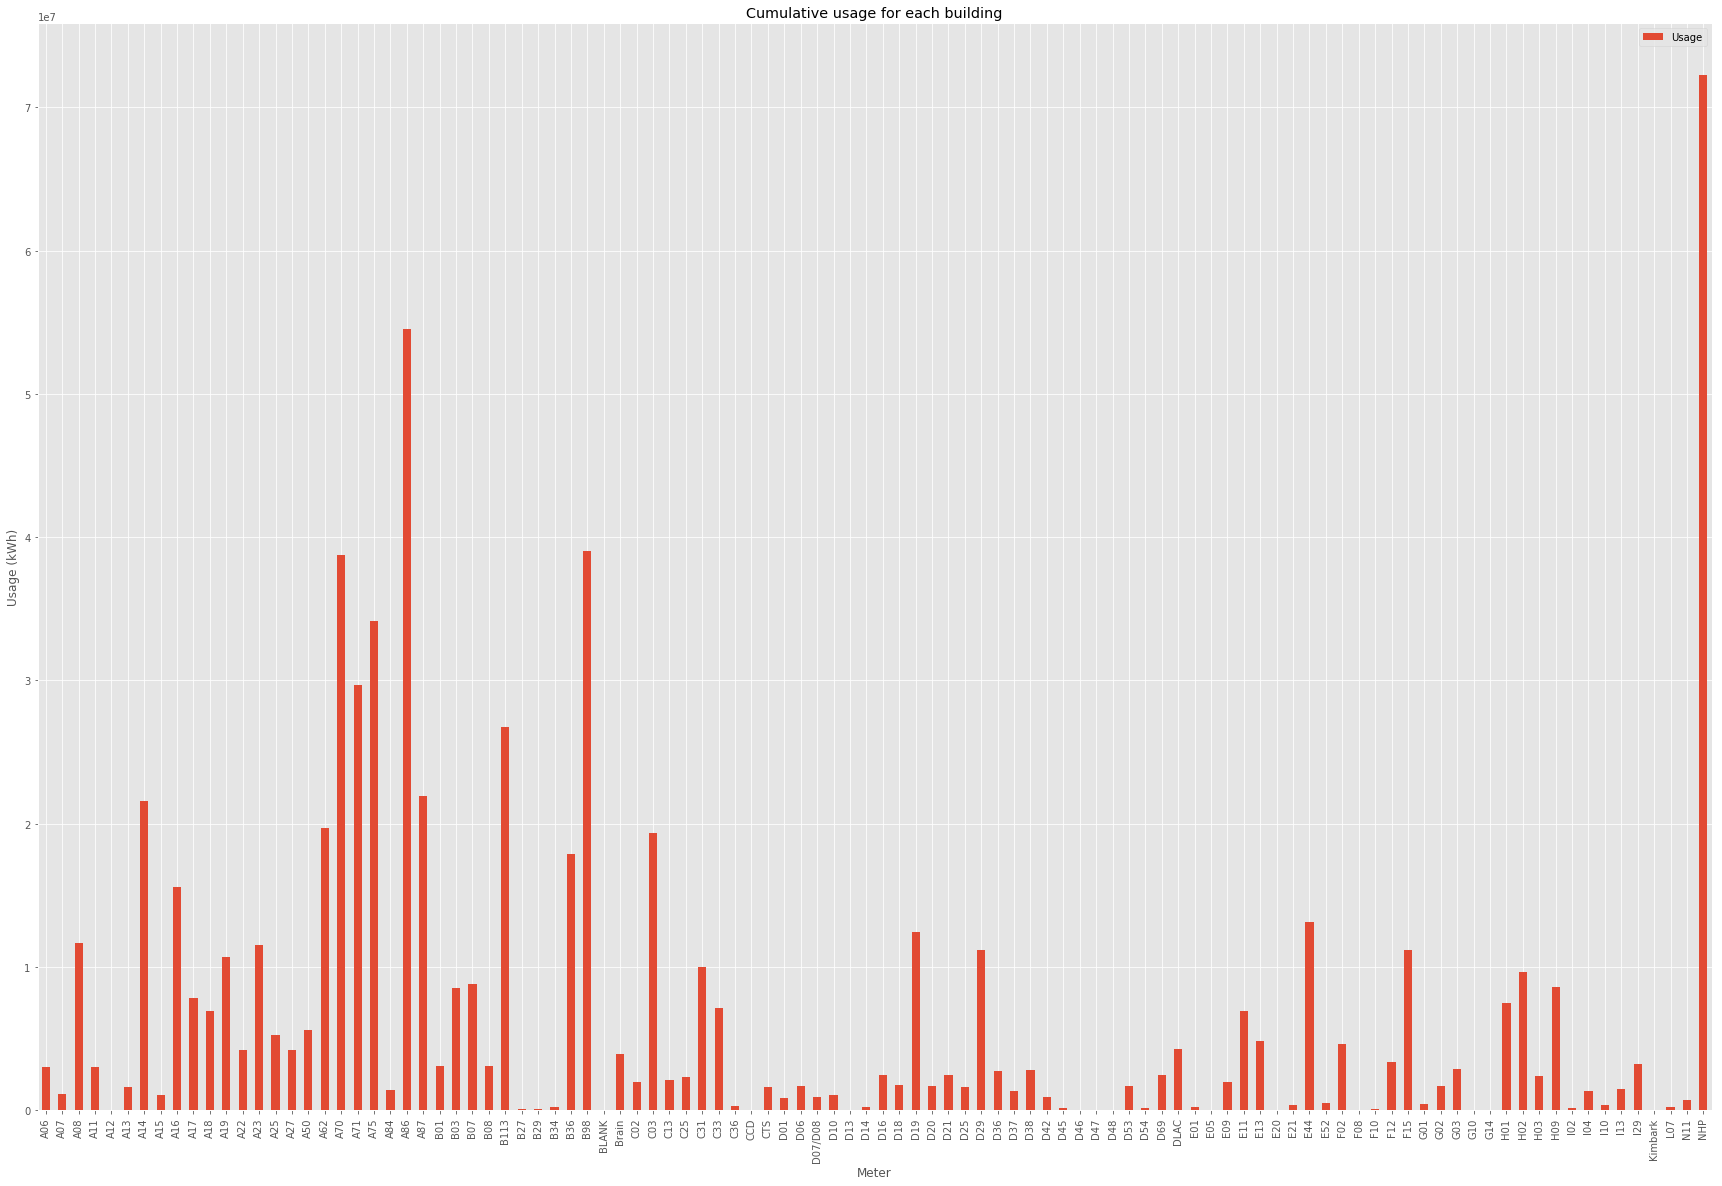

In [52]:
cumulative.plot(x="Meter", y="Usage", kind="bar", figsize=(30, 20))
plt.title('Cumulative usage for each building')
plt.ylabel('Usage (kWh)')
plt.savefig('Graphs/cUsage.png')

In [ ]:
#checking to see if sums were correct 
chksum = electric[electric['Meter'].str.contains('D38')]
chksum.Usage.sum()


## Cumulative/Area

In [30]:
alst = []
for i in unicodes:
    alst.append(propertyCode[propertyCode['Property Code'].isin([i])]['FCIM Gross Area'])

In [42]:
area = pd.DataFrame(alst).sum(axis=1)
area = area.reset_index(drop=True)
grossArea = cusage.divide(area)

In [43]:
ad = {'Usage': grossArea, 'Meter': unicodes,}
carea = pd.DataFrame(ad)
carea = carea.sort_values('Meter', ascending=True)

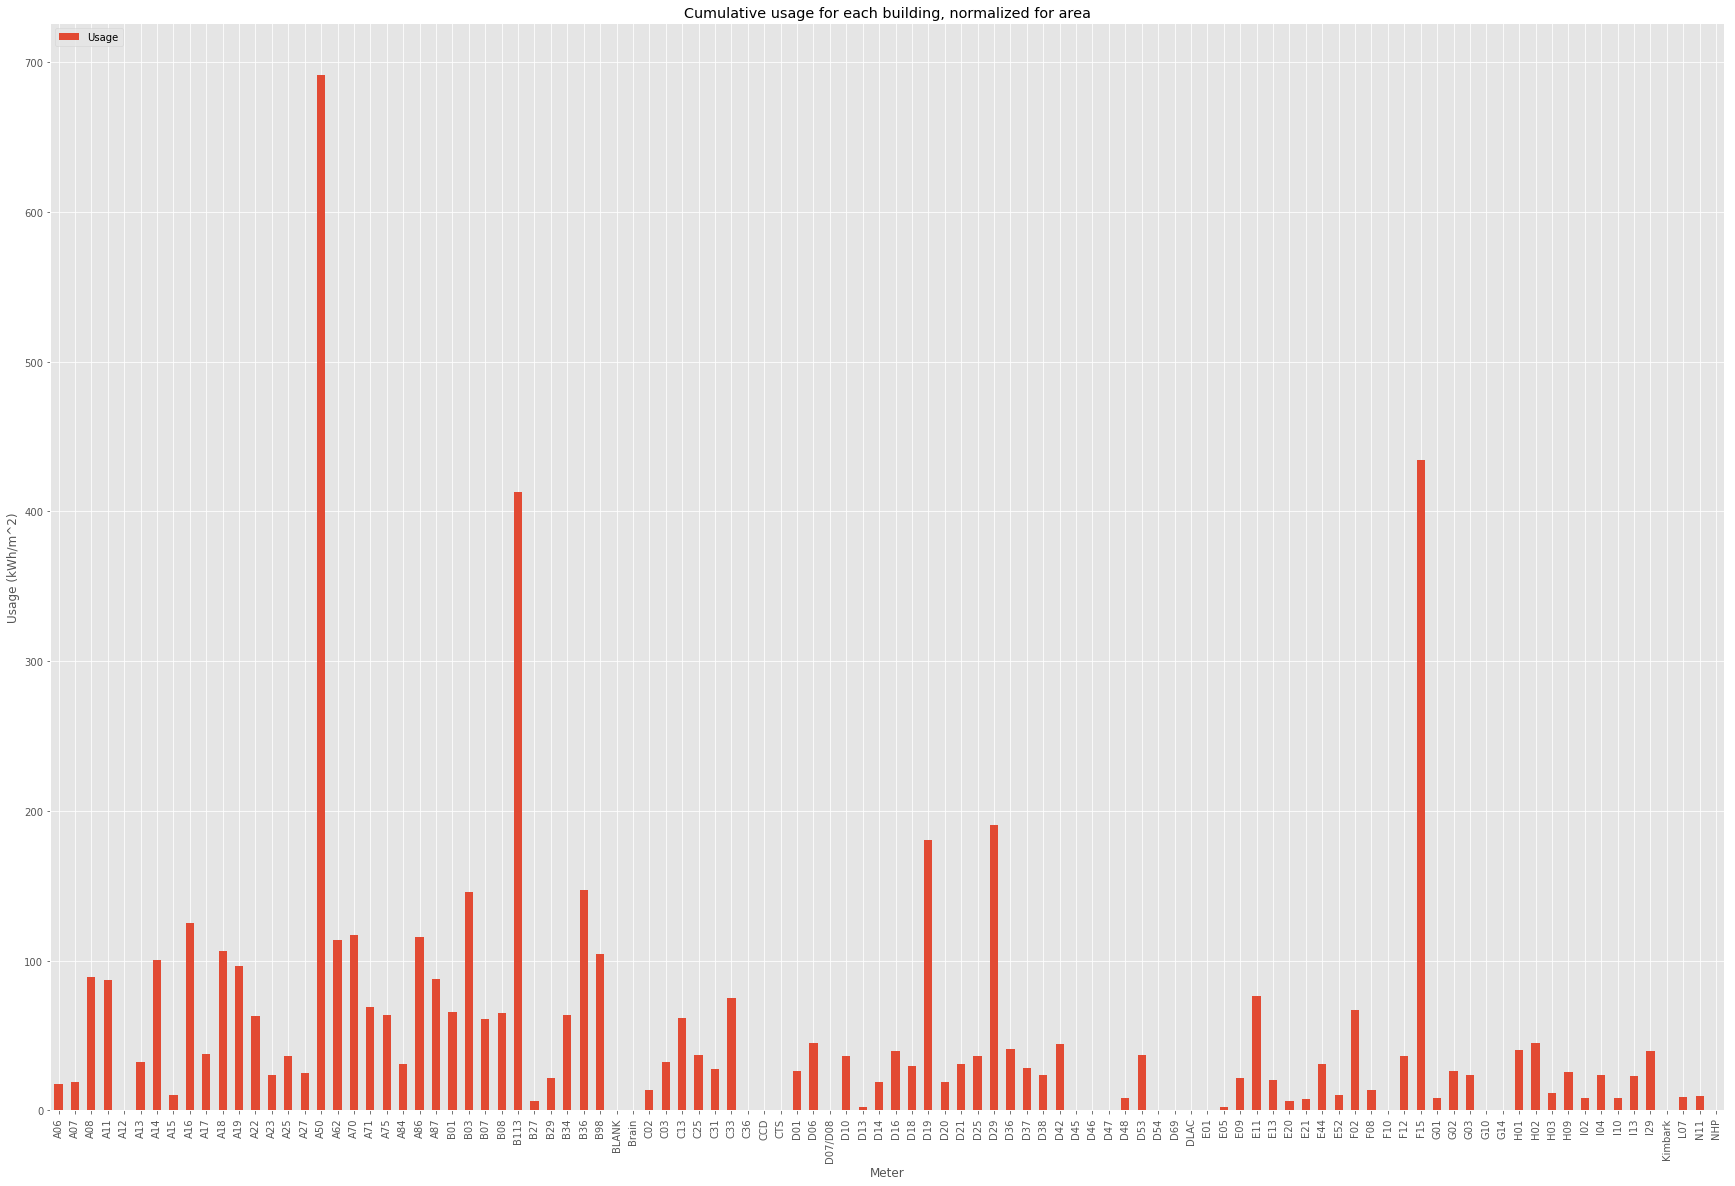

In [53]:
carea.plot(x="Meter", y="Usage", kind="bar", figsize=(30, 20))
plt.title('Cumulative usage for each building, normalized for area')
plt.ylabel('Usage (kWh/m^2)')
# plt.savefig("Graphs/cusageNormArea.png")

## Cumulative/Area, Building Type 

### Start with cumulative data

##### Get type and codes

In [296]:
blduse = propertyCode[propertyCode['Building Use'].str.contains('Residential', na=False)]
bldcode = pd.Series([(b[0]) for b in blduse['Property Code'].str.split()])
ubldcode = bldcode.unique()
ubldcode

array(['A03', 'A28', 'A29', 'A30', 'A31', 'A32', 'A33', 'A34', 'A35',
       'A36', 'A37', 'A38', 'A39', 'A40', 'A41', 'A42', 'A43', 'A44',
       'A45', 'A47', 'A49', 'A51', 'A52', 'A53', 'A54', 'A55', 'A56',
       'A57', 'A58', 'A59', 'A60', 'A61', 'A63', 'A64', 'A65', 'A66',
       'A67', 'A68', 'A69', 'A74', 'A80', 'A82', 'A83', 'A88', 'A89',
       'A92', 'B100', 'B101', 'B102', 'B103', 'B104', 'B108', 'B109',
       'B110', 'B111', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20',
       'B21', 'B22', 'B23', 'B26', 'B35', 'B41', 'B42', 'B44', 'B53',
       'B54', 'B59', 'B60', 'B61', 'B63', 'B75', 'B79', 'B81', 'B86',
       'B87', 'B88', 'B90', 'B91', 'B93', 'B97', 'C08', 'C11', 'C35',
       'D31', 'D71', 'E14', 'E15', 'E17', 'E22', 'E23', 'E28', 'E38',
       'E39', 'G01', 'G05', 'G09', 'G12', 'G13', 'H04', 'I03', 'I06',
       'I07', 'I08', 'I09', 'I10', 'I12', 'K02', 'K03', 'K04', 'L01',
       'L04', 'L05', 'L06', 'L07', 'L08', 'L09', 'L12', 'L13', 'L15',
       'L17', 'L22


#### Make new df from codes 

In [299]:
newdf = electric[codes.isin(bldcode)]
newdf = newdf.reset_index(drop=True)
newdf.sort_values('Meter', ascending=True)

,Type,Meter,Date,Start Time,Usage,Usage Unit,Temperature,Temperature Unit,Datetime
105124,Electric Usage,G01 Orthogenic School (B2),2015-12-28,03:30,0.0000,kWh,33.0,F,2015-12-28 03:30:00
86787,Electric Usage,G01 Orthogenic School (B2),2014-12-11,02:00,0.0000,kWh,26.0,F,2014-12-11 02:00:00
86788,Electric Usage,G01 Orthogenic School (B2),2014-12-11,02:30,0.0000,kWh,26.0,F,2014-12-11 02:30:00
86789,Electric Usage,G01 Orthogenic School (B2),2014-12-11,03:00,0.0000,kWh,28.0,F,2014-12-11 03:00:00
86790,Electric Usage,G01 Orthogenic School (B2),2014-12-11,03:30,0.0000,kWh,28.0,F,2014-12-11 03:30:00
86791,Electric Usage,G01 Orthogenic School (B2),2014-12-11,04:00,0.0000,kWh,30.0,F,2014-12-11 04:00:00
86792,Electric Usage,G01 Orthogenic School (B2),2014-12-11,04:30,0.0000,kWh,30.0,F,2014-12-11 04:30:00
86793,Electric Usage,G01 Orthogenic School (B2),2014-12-11,05:00,0.0000,kWh,31.0,F,2014-12-11 05:00:00
86794,Electric Usage,G01 Orthogenic School (B2),2014-12-11,05:30,0.0000,kWh,31.0,F,2014-12-11 05:30:00
86795,Electric Usage,G01 Orthogenic School (B2),2014-12-11,06:00,0.0000,kWh,33.0,F,2014-12-11 06:00:00


#### Get building codes from type dataframe

In [173]:
newcode = pd.Series([b[0] for b in newdf['Meter'].str.split()])
unewcode = newcode.unique()
unewcode.sort()

In [174]:
unewcode

array(['C33', 'E13', 'E21', 'G03', 'H03', 'H09'], dtype=object)

#### Store cumulative usage values in list

In [175]:
cmltv = []

for i in unewcode:
    cmltv.append(newdf.Usage[newcode.isin([i])].sum())

#### Make list a series

In [176]:
cmltv = pd.Series(cmltv)
cmltv

0    7.162337e+06
1    4.877697e+06
2    3.880613e+05
3    2.856528e+06
4    2.371863e+06
5    8.608299e+06
dtype: float64

### Now to Area

In [177]:
nalst = []
for i in unewcode:
    nalst.append(propertyCode[propertyCode['Property Code'].isin([i])]['FCIM Gross Area'])

In [178]:
narea = pd.DataFrame(nalst).sum(axis=1)
narea = narea.reset_index(drop=True)
narea

0     95682.00
1    237120.34
2     50697.42
3    121452.48
4    201402.16
5    338679.33
dtype: float64

In [179]:
usageNA = cmltv.divide(narea)
usageNA

0    74.855636
1    20.570557
2     7.654458
3    23.519714
4    11.776753
5    25.417256
dtype: float64

In [246]:
ndata = {'Meter': unewcode, 'Cumulative Usage/area': usageNA}
finaldf = pd.DataFrame(ndata)

In [247]:
finaldf

,Cumulative Usage/area,Meter
0,74.855636,C33
1,20.570557,E13
2,7.654458,E21
3,23.519714,G03
4,11.776753,H03
5,25.417256,H09


### Turning everything into a function

In [19]:
def typeCA(bldtype, x, y):
    blduse = propertyCode[propertyCode['Building Use'].str.contains(bldtype, na=False)]
    bldcode = pd.Series([(b[0]) for b in blduse['Property Code'].str.split()])
    ubldcode = bldcode.unique()
    newdf = electric[codes.isin(bldcode)]
    newdf = newdf.reset_index(drop=True)
    newcode = pd.Series([b[0] for b in newdf['Meter'].str.split()])
    unewcode = newcode.unique()
    unewcode.sort()
    cmltv = []
    for i in unewcode:
        cmltv.append(newdf.Usage[newcode.isin([i])].sum())
    cmltv = pd.Series(cmltv)
    nalst = []
    for i in unewcode:
        nalst.append(propertyCode[propertyCode['Property Code'].isin([i])]['FCIM Gross Area'])
    narea = pd.DataFrame(nalst).sum(axis=1)
    narea = narea.reset_index(drop=True)
    usageNA = cmltv.divide(narea)
    ndata = {'Meter': unewcode, 'Cumulative Usage/area': usageNA}
    finaldf = pd.DataFrame(ndata)
    finaldf = finaldf.reset_index(drop=True)
    finaldf.plot(x=x, y=y, kind='bar')
    plt.ylabel('Usage (kWh/m^2)')
    plt.title(bldtype)

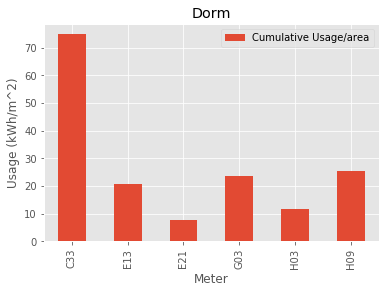

In [20]:
dormdf = typeCA("Dorm", 'Meter', 'Cumulative Usage/area')
dormdf

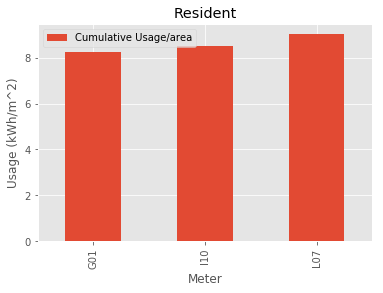

In [14]:
rsdtdf = typeCA('Resident')
rsdtdf

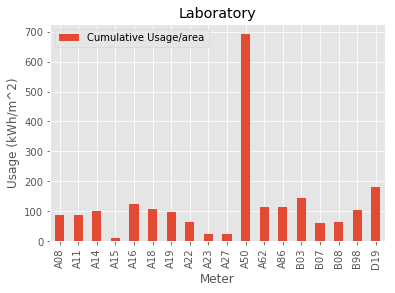

In [15]:
labdf = typeCA('Laboratory')
labdf

## Getting separate df for building type 

#### Make separate df based off building type

In [150]:
usedf = propertyCode[propertyCode['Building Use'].str.contains('Patient Care', na=False)]
usedf

,Property Code,Property Name,Fac Ex Abbr,Fac Ex No,Address Main Entrance,Property Status,Site Code,Property Category,Responsible Unit,Building Use,...,Caretaker,Estimated Permanent Occupancy,Estimated Temporary Occupancy,CSM,Alternate Address,State,City,Comments,Site Gross,Alternate Property Code
7,A10,Arthur Rubloff Intensive Care Tower,Rubloff,05,5841 South Maryland Avenue,Owned,Campus,Building,Chicago Biology and Medicine,Patient Care,...,Chicago Biology and Medicine,86.0,9.0,No,NaN,IL,CHICAGO,NaN,0.0,NaN
14,A17,Sylvain & Arma Wyler Children's Hospital,WCH,05,5837 South Maryland Avenue,Owned,Campus,Building,Chicago Biology and Medicine,Patient Care,...,Chicago Biology and Medicine,307.0,195.0,No,NaN,IL,CHICAGO,NaN,0.0,NaN
67,A71,Bernard A. Mitchell Hospital,MH,05,5815 South Maryland Avenue,Owned,Campus,Building,Chicago Biology and Medicine,Patient Care,...,Chicago Biology and Medicine,672.0,187.0,No,NaN,IL,CHICAGO,MC Complex,0.0,NaN
71,A75,Duchossois Center for Advanced Medicine,DCAM,05,5758 South Maryland Avenue,Owned,Campus,Building,Chicago Biology and Medicine,Patient Care,...,Chicago Biology and Medicine,205.0,818.0,No,NaN,IL,CHICAGO,The Duchossois Center for Advanced Medicine (D...,0.0,NaN
80,A87,Comer Children's Hospital,CCH,05,5721 South Maryland Avenue,Owned,Campus,Building,Chicago Biology and Medicine,Patient Care,...,Chicago Biology and Medicine,327.0,204.0,No,NaN,IL,CHICAGO,Built in 2004 and expanded in 2006 [See A94 Co...,0.0,NaN
86,A94,Comer Center for Children and Specialty Care,CCCSC,NaN,5730 South Drexel Avenue,Owned,Campus,Building,Chicago Biology and Medicine,Patient Care,...,Chicago Biology and Medicine,11.0,83.0,No,NaN,IL,CHICAGO,Full name is Comer Center for Children and Spe...,0.0,NaN
87,A95,Center for Care and Discovery,CCD,NaN,5700 South Maryland Avenue,Owned,Campus,Building,Chicago Biology and Medicine,Patient Care,...,Chicago Biology and Medicine,0.0,0.0,No,NaN,IL,CHICAGO,"A ten story adult hospital focused on cancer, ...",0.0,NaN
537,K08,47th Street and Lake Park (Vacant),NaN,NaN,1301A East 47th Street,Sold/Terminated,Hyde Park,Building,Chicago Biology and Medicine,Patient Care,...,Other,0.0,0.0,No,NaN,IL,CHICAGO,NaN,0.0,NaN
538,K09,Bally's - Therapy Services,NaN,NaN,1302 East 47th Street,Sold/Terminated,Hyde Park,Building,Chicago Biology and Medicine,Patient Care,...,Chicago Biology and Medicine,0.0,0.0,No,NaN,IL,CHICAGO,Lease terminated 8/6/2014,0.0,NaN
550,L11,Friend Family Health Center,FFHC,05,800 East 55th Street,Owned,Campus,Building,Chicago Biology and Medicine,Patient Care,...,Chicago Biology and Medicine,0.0,0.0,No,NaN,IL,CHICAGO,"Hospital Building,not on PMS",0.0,NaN


#### Get property code of each building and save in list

In [151]:
uselst = []
for i in usedf['Property Code']:
    uselst.append(i)

#### Create new dataframe that has temperature, usage, time information based off building type

In [152]:
groupdf = electric[codes.isin(uselst)]
groupdf

,Type,Meter,Date,Start Time,Usage,Usage Unit,Temperature,Temperature Unit
0,Electric Usage,A71 Mitchell Hospital (B1),2014-04-11,23:30,433.44000,kWh,NaN,F
1,Electric Usage,A71 Mitchell Hospital (B1),2014-04-12,00:00,432.36000,kWh,52.0,F
2,Electric Usage,A71 Mitchell Hospital (B1),2014-04-12,00:30,435.24000,kWh,52.0,F
3,Electric Usage,A71 Mitchell Hospital (B1),2014-04-12,01:00,433.80000,kWh,55.0,F
4,Electric Usage,A71 Mitchell Hospital (B1),2014-04-12,01:30,428.76000,kWh,55.0,F
5,Electric Usage,A71 Mitchell Hospital (B1),2014-04-12,02:00,432.00000,kWh,57.0,F
6,Electric Usage,A71 Mitchell Hospital (B1),2014-04-12,02:30,431.28000,kWh,57.0,F
7,Electric Usage,A71 Mitchell Hospital (B1),2014-04-12,03:00,428.04000,kWh,61.0,F
8,Electric Usage,A71 Mitchell Hospital (B1),2014-04-12,03:30,426.96000,kWh,61.0,F
9,Electric Usage,A71 Mitchell Hospital (B1),2014-04-12,04:00,428.76000,kWh,67.0,F


#### Choose specific building 

In [181]:
sgroupdf1 = groupdf[groupdf['Meter'].str.contains('A71')]
sgroupdf1

,Type,Meter,Date,Start Time,Usage,Usage Unit,Temperature,Temperature Unit
0,Electric Usage,A71 Mitchell Hospital (B1),2014-04-11,23:30,433.44,kWh,NaN,F
1,Electric Usage,A71 Mitchell Hospital (B1),2014-04-12,00:00,432.36,kWh,52.0,F
2,Electric Usage,A71 Mitchell Hospital (B1),2014-04-12,00:30,435.24,kWh,52.0,F
3,Electric Usage,A71 Mitchell Hospital (B1),2014-04-12,01:00,433.80,kWh,55.0,F
4,Electric Usage,A71 Mitchell Hospital (B1),2014-04-12,01:30,428.76,kWh,55.0,F
5,Electric Usage,A71 Mitchell Hospital (B1),2014-04-12,02:00,432.00,kWh,57.0,F
6,Electric Usage,A71 Mitchell Hospital (B1),2014-04-12,02:30,431.28,kWh,57.0,F
7,Electric Usage,A71 Mitchell Hospital (B1),2014-04-12,03:00,428.04,kWh,61.0,F
8,Electric Usage,A71 Mitchell Hospital (B1),2014-04-12,03:30,426.96,kWh,61.0,F
9,Electric Usage,A71 Mitchell Hospital (B1),2014-04-12,04:00,428.76,kWh,67.0,F


### Temperature vs usage for one building

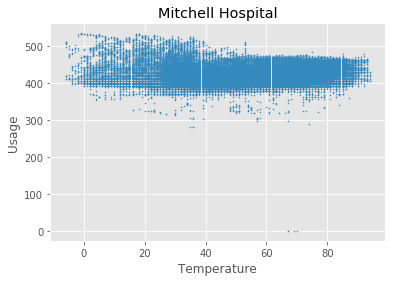

In [188]:
sgroupdf1.plot(x='Temperature', y='Usage', kind='scatter', s=1)
plt.title("Mitchell Hospital")

### Plot multiple buildings

##### Hospitals

In [180]:
sgroupdf2 = groupdf[groupdf['Meter'].str.contains('A75')]
sgroupdf3 = groupdf[groupdf['Meter'].str.contains('A87')]

In [155]:
glst = []
for i in groupdf['Meter']:
    glst.append(i)
glst = pd.Series(glst)
glst.unique()

array(['A71 Mitchell Hospital (B1)', 'A75 DCAM (R1)', 'A75 DCAM (R2)',
       'A75 DCAM (R3)', 'A17 Wyler Child Hospital (B1)',
       "A87 Comer's Child Hospital (R4)",
       "A87 Comer's Child Hospital (R5)",
       "A87 Comer's Child Hospital (R6)", 'A75 DCAM (R4)',
       "A87 Comer's Child Hospital (B6)",
       "A87 Comer's Child Hospital (B7)",
       "A87 Comer's Child Hospital (B8)",
       "A87 Comer's Child Hospital (B9)", 'A17 Wyler Child Hospital (U1)',
       "A87 Comer's Child Hospital (U2)",
       "A87 Comer's Child Hospital (U3)",
       "A87 Comer's Child Hospital (U4)", 'A17 Wyler Child Hospital (U2)',
       'A71 Mitchell Hospital (U1)', "A87 Comer's Child Hospital (U1)",
       'A75 DCAM (U1)', "A87 Comer's Child Hospital (U5)",
       "A87 Comer's Child Hospital (U6)", 'A75 DCAM (U2)', 'A75 DCAM (U3)',
       'A75 DCAM (U4)'], dtype=object)

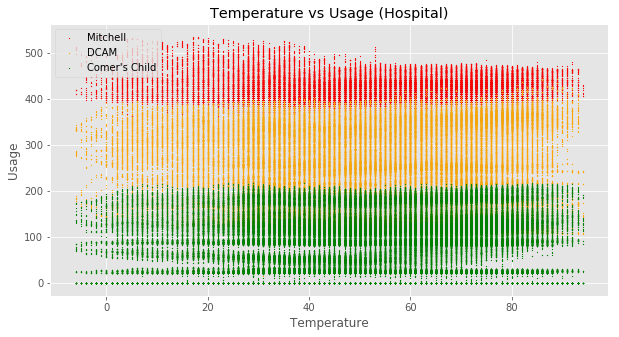

In [159]:
ax = sgroupdf1.plot(x='Temperature', y='Usage', kind='scatter', color='red', s=0.5, label='Mitchell ', figsize=(10, 5))
sgroupdf2.plot(ax=ax, x='Temperature', y='Usage', kind='scatter', color='orange', s=0.5, label="DCAM")
sgroupdf3.plot(ax=ax, x='Temperature', y='Usage', kind='scatter', color='green', s=0.5, label="Comer's Child")
plt.title('Temperature vs Usage (Hospital)')

##### Labs

In [197]:
usedf2 = propertyCode[propertyCode['Building Use'].str.contains('Lab', na=False)]
usedf2

,Property Code,Property Name,Fac Ex Abbr,Fac Ex No,Address Main Entrance,Property Status,Site Code,Property Category,Responsible Unit,Building Use,...,Caretaker,Estimated Permanent Occupancy,Estimated Temporary Occupancy,CSM,Alternate Address,State,City,Comments,Site Gross,Alternate Property Code
0,A01,Visual Sciences Center,VSC,24,939 East 57th Street,Demolished,Campus,Building,Inactive,Laboratory,...,Inactive,0.0,0.0,No,NaN,IL,CHICAGO,Demolished for IRB (A86),0.0,NaN
1,A02,Whitman Laboratory,Wh,70,915 East 57th Street,Demolished,Campus,Building,Inactive,Laboratory,...,Inactive,0.0,0.0,No,NaN,IL,CHICAGO,Demolished for IRB (A86),0.0,NaN
5,A08,Hinds Laboratory,HGS,03,5734 South Ellis Avenue,Owned,Campus,Building,University Facilities Services,Laboratory,...,University Facilities Services-North Shop,164.0,392.0,Yes,NaN,IL,CHICAGO,Getty Grant assessment 2004,0.0,NaN
8,A11,Marjorie B. Kovler Viral Oncology Laboratories,MKL,44,5841 South Maryland Avenue,Owned,Campus,Building,Chicago Biology and Medicine,Laboratory,...,Chicago Biology and Medicine,22.0,19.0,No,NaN,IL,CHICAGO,NaN,0.0,NaN
11,A14,Surgery Brain Research Institute,SBRI,05,5812 South Ellis Avenue,Owned,Campus,Building,Chicago Biology and Medicine,Laboratory,...,Chicago Biology and Medicine,136.0,241.0,No,NaN,IL,CHICAGO,NaN,0.0,NaN
12,A15,Abbott Memorial Hall,AB,02,947-51 East 58th Street,Owned,Campus,Building,Chicago Biology and Medicine,Laboratory,...,Chicago Biology and Medicine,56.0,142.0,No,NaN,IL,CHICAGO,NaN,0.0,NaN
13,A16,Peck Pavilion,Peck,NaN,950 East 59th Street,Owned,Campus,Building,Chicago Biology and Medicine,Laboratory,...,Chicago Biology and Medicine,63.0,196.0,No,NaN,IL,CHICAGO,NaN,0.0,NaN
15,A18,Armour Clinical Research Building,Armour,NaN,950 East 59th Street,Owned,Campus,Building,Chicago Biology and Medicine,Laboratory,...,Chicago Biology and Medicine,127.0,100.0,No,NaN,IL,CHICAGO,NaN,0.0,NaN
16,A19,Franklin McLean Research Institute,FMI,05,5824 South Ellis Avenue,Owned,Campus,Building,Chicago Biology and Medicine,Laboratory,...,Chicago Biology and Medicine,100.0,95.0,No,NaN,IL,CHICAGO,NaN,0.0,NaN
18,A21,Hicks McElwee Hospital,HICKS,NaN,970 East 59th Street,Owned,Campus,Building,Chicago Biology and Medicine,Laboratory,...,Chicago Biology and Medicine,99.0,89.0,No,NaN,IL,CHICAGO,NaN,0.0,NaN


In [198]:
uselst2 = []
for i in usedf2['Property Code']:
    uselst2.append(i)

In [199]:
groupdf2 = electric[codes.isin(uselst2)]
groupdf2

,Type,Meter,Date,Start Time,Usage,Usage Unit,Temperature,Temperature Unit
261772,Electric Usage,A11 Kovler Laboratories (B1),2014-04-11,23:30,86.90400,kWh,NaN,F
261773,Electric Usage,A11 Kovler Laboratories (B1),2014-04-12,00:00,87.76800,kWh,52.0,F
261774,Electric Usage,A11 Kovler Laboratories (B1),2014-04-12,00:30,87.84000,kWh,52.0,F
261775,Electric Usage,A11 Kovler Laboratories (B1),2014-04-12,01:00,88.05600,kWh,55.0,F
261776,Electric Usage,A11 Kovler Laboratories (B1),2014-04-12,01:30,88.20000,kWh,55.0,F
261777,Electric Usage,A11 Kovler Laboratories (B1),2014-04-12,02:00,87.26400,kWh,57.0,F
261778,Electric Usage,A11 Kovler Laboratories (B1),2014-04-12,02:30,87.84000,kWh,57.0,F
261779,Electric Usage,A11 Kovler Laboratories (B1),2014-04-12,03:00,87.19200,kWh,61.0,F
261780,Electric Usage,A11 Kovler Laboratories (B1),2014-04-12,03:30,87.40800,kWh,61.0,F
261781,Electric Usage,A11 Kovler Laboratories (B1),2014-04-12,04:00,87.69600,kWh,67.0,F


In [201]:
glst2 = []
for i in groupdf2['Meter']:
    glst2.append(i)
glst2 = pd.Series(glst2)
glst2.unique()

array(['A11 Kovler Laboratories (B1)', 'A08 Hinds Laboratories (R1)',
       'A62 Cummings Life Sciences (B1)',
       'A22 Carlson Animal Research (B4)',
       'A27 Chicago Lying Hospital (B1)',
       'A14 Brain Research Pavilion (B1)', 'A23 Billings Hospital (B1)',
       'A16 Peck Pavilion (B1)', 'A50 MRS Building (CLSC) (B1)',
       'A16 Peck Pavilion (B2)', 'A19 Franklin Institute (B2)',
       'A22 Carlson Animal Research (B3)', 'A15 Abbott Memorial Hall (R1)',
       'A14 Brain Research Pavilion (R4)', 'A18 Armour Research (B1)',
       'A16 Peck Pavilion (B3)', 'A16 Peck Pavilion (B4)',
       'A62 Cummings Life Sciences (B3)', 'B98 KCBD (R1)', 'B98 KCBD (R2)',
       'B98 KCBD (R3)', 'A19 Franklin Institute (B3)', 'A86 GCIS (B6)',
       'A23 Billings Hospital (B2)', 'A86 GCIS (B7)',
       'A62 Cummings Life Sciences (B5)', 'D19 Jones Laboratory (B1)',
       'D19 Jones S/B Searle (B2)', 'A22 Carlson Animal Research (B2)',
       'A08 Hinds Laboratories (B2)', 'D19 Jones S

In [205]:
labdf1 = groupdf2[groupdf2['Meter'].str.contains('A11')]
labdf2 = groupdf2[groupdf2['Meter'].str.contains('A08')]
labdf3 = groupdf2[groupdf2['Meter'].str.contains('A62')]
labdf4 = groupdf2[groupdf2['Meter'].str.contains('A22')]
labdf5 = groupdf2[groupdf2['Meter'].str.contains('A27')]

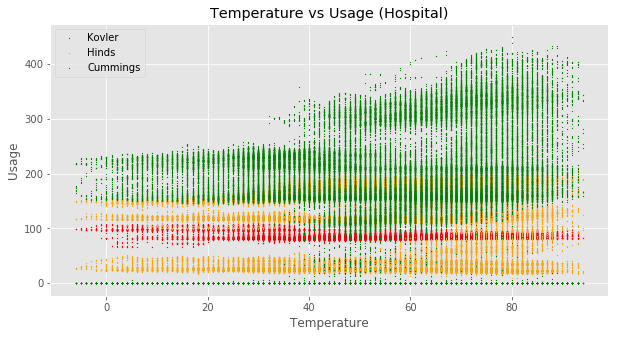

In [207]:
ax1 = labdf1.plot(x='Temperature', y='Usage', kind='scatter', color='red', s=0.5, label='Kovler', figsize=(10, 5))
labdf2.plot(ax=ax1, x='Temperature', y='Usage', kind='scatter', color='orange', s=0.5, label="Hinds")
labdf3.plot(ax=ax1, x='Temperature', y='Usage', kind='scatter', color='green', s=0.5, label="Cummings")
plt.title('Temperature vs Usage (Hospital)')

## Combining it all into a function

/Users/abisolaolawale/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


TypeError: Empty 'DataFrame': no numeric data to plot

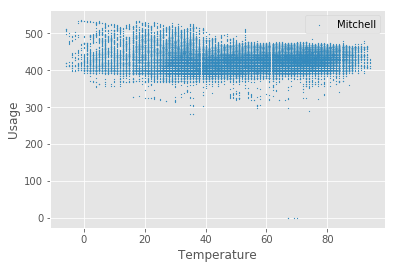

In [123]:
btype('Patient Care')